In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import KFold

D:\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [23]:
features=pd.read_csv('D:/Github/machine learning/Kaggle/Kobe shot/data.csv')

In [24]:
features.head()

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,...,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id
0,Jump Shot,Jump Shot,10,20000012,33.9723,167,72,-118.1028,10,1,...,2PT Field Goal,Right Side(R),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,1
1,Jump Shot,Jump Shot,12,20000012,34.0443,-157,0,-118.4268,10,1,...,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,2
2,Jump Shot,Jump Shot,35,20000012,33.9093,-101,135,-118.3708,7,1,...,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,3
3,Jump Shot,Jump Shot,43,20000012,33.8693,138,175,-118.1318,6,1,...,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,4
4,Driving Dunk Shot,Dunk,155,20000012,34.0443,0,0,-118.2698,6,2,...,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,5


In [25]:
nona =  features[pd.notnull(features['shot_made_flag'])]  # for exploratory analysis

Text(0.5,1,'lat and lon')

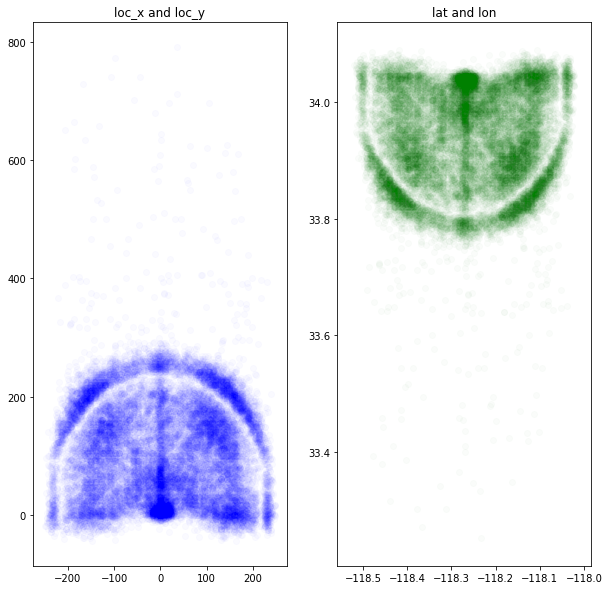

In [26]:
alpha = 0.02
plt.figure(figsize=(10,10))

# loc_x and loc_y
plt.subplot(121)
plt.scatter(nona.loc_x, nona.loc_y, color='blue', alpha=alpha)
plt.title('loc_x and loc_y')

# lat and lon
plt.subplot(122)
plt.scatter(nona.lon, nona.lat, color='green', alpha=alpha)
plt.title('lat and lon')

These plot are shaped like basket ball courts. So loc_x, loc_y, lat and lon seem to mean the position from which the ball was tossed. However, since the region under the net is half-circle-shaped, it would be more suitable to transform the variable into polar coodinate.

In [27]:
features['dist'] = np.sqrt(features['loc_x']**2 + features['loc_y']**2)

loc_x_zero = features['loc_x'] == 0
features['angle'] = np.zeros(len(features))
features['angle'][~loc_x_zero] = np.arctan(features['loc_y'][~loc_x_zero] / features['loc_x'][~loc_x_zero])
features['angle'][loc_x_zero] = np.pi / 2 

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [28]:
features['time_remaining']=60*features['minutes_remaining']+features['seconds_remaining']


In [31]:
drop_features=['combined_shot_type','game_event_id','game_id','lat','loc_x','loc_y','lon','minutes_remaining','seconds_remaining','shot_distance','shot_type','shot_zone_area','shot_zone_basic','shot_zone_range','team_id','team_name','game_date','matchup','shot_id']

In [32]:
features=features.drop(drop_features,axis=1)

In [36]:
cat_features=['action_type','period','playoffs','season','opponent']
for c in cat_features:
    dummies=pd.get_dummies(features[c],prefix=c)
    features=pd.concat([features,dummies],axis=1)

features.drop(cat_features,axis=1,inplace=True)

In [37]:
data=features[pd.notnull(features['shot_made_flag'])]
test=features[pd.isnull(features['shot_made_flag'])]

In [38]:
data.head()

,shot_made_flag,dist,angle,time_remaining,action_type_Alley Oop Dunk Shot,action_type_Alley Oop Layup shot,action_type_Cutting Finger Roll Layup Shot,action_type_Cutting Layup Shot,action_type_Driving Bank shot,action_type_Driving Dunk Shot,...,opponent_PHI,opponent_PHX,opponent_POR,opponent_SAC,opponent_SAS,opponent_SEA,opponent_TOR,opponent_UTA,opponent_VAN,opponent_WAS
1,0.0,157.000000,-0.000000,622,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,1.0,168.600119,-0.928481,465,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0.0,222.865430,0.903063,412,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1.0,0.000000,1.570796,379,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
5,0.0,145.416643,0.075717,572,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [40]:
import scipy as sp
def logloss(act, pred):
    epsilon = 1e-15
    pred = sp.maximum(epsilon, pred)
    pred = sp.minimum(1-epsilon, pred)
    ll = sum(act*sp.log(pred) + sp.subtract(1,act)*sp.log(sp.subtract(1,pred)))
    ll = ll * -1.0/len(act)
    return ll

In [52]:
labels=data.pop('shot_made_flag')

KeyError: 'shot_made_flag'

In [51]:
range_n = np.logspace(0,2,num=3).astype(int)
best_n = 0
scores_n = []
min_score=100000

In [53]:
for n in range_n:
    rfc_score = 0.
    rfr = RandomForestClassifier(random_state=0, n_estimators=n, n_jobs=-1)
    for train_idx,val_idx in KFold(len(data),n_folds=5,shuffle=True):
        rfr.fit(data.iloc[train_idx],labels.iloc[train_idx])
        pred=rfr.predict(data.iloc[val_idx])
        rfc_score += logloss(labels.iloc[val_idx],pred) / 5
    
    scores_n.append(rfc_score)
    if rfc_score < min_score:
        min_score = rfc_score
        best_n = n

print (best_n,min_score)
        
        

100 11.830679020948093


In [54]:
range_d = np.logspace(0,2,num=3).astype(int)
best_d = 0
scores_d = []
min_score=100000

In [55]:
for d in range_d:
    rfc_score = 0.
    rfr = RandomForestClassifier(random_state=0, max_depth=d, n_estimators=best_n,n_jobs=-1)
    for train_idx,val_idx in KFold(len(data),n_folds=5,shuffle=True):
        rfr.fit(data.iloc[train_idx],labels.iloc[train_idx])
        pred=rfr.predict(data.iloc[val_idx])
        rfc_score += logloss(labels.iloc[val_idx],pred) / 5
    
    scores_d.append(rfc_score)
    if rfc_score < min_score:
        min_score = rfc_score
        best_d = d

print (best_d,min_score)

10 11.051077593578587


Text(0.5,0,'max depth')

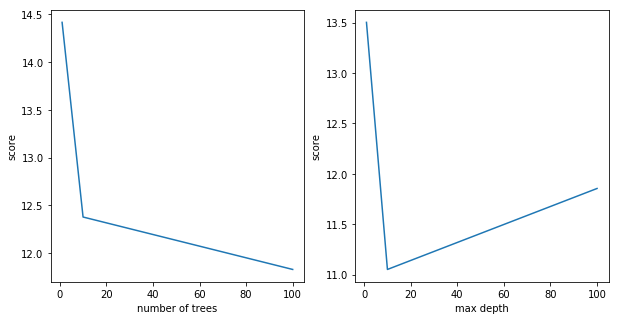

In [57]:
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.plot(range_n, scores_n)
plt.ylabel('score')
plt.xlabel('number of trees')

plt.subplot(122)
plt.plot(range_d, scores_d)
plt.ylabel('score')
plt.xlabel('max depth')

### Final model

In [61]:
rfr = RandomForestClassifier(random_state=0, max_depth=best_d, n_estimators=best_n,n_jobs=-1)
rfr.fit(data,labels)
#test.pop('shot_made_flag')
pred=rfr.predict_proba(test)


In [68]:
pred

array([[0.63834954, 0.36165046],
       [0.61439792, 0.38560208],
       [0.37185821, 0.62814179],
       ...,
       [0.34779848, 0.65220152],
       [0.33831274, 0.66168726],
       [0.42638633, 0.57361367]])

### save the output

In [69]:
sample_sub=pd.read_csv('D:/Github/machine learning/Kaggle/Kobe shot/sample_submission.csv')

result = pd.DataFrame({'shot_id':sample_sub['shot_id'].as_matrix(), 'shot_made_flag':pred[:,1]})
result.to_csv("D:/Github/machine learning/Kaggle/Kobe shot/predictions.csv", index=False)